<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

- matplotlib has a figure and axis
- to add another axis you can use twinx()

### 1.2 We need some data.

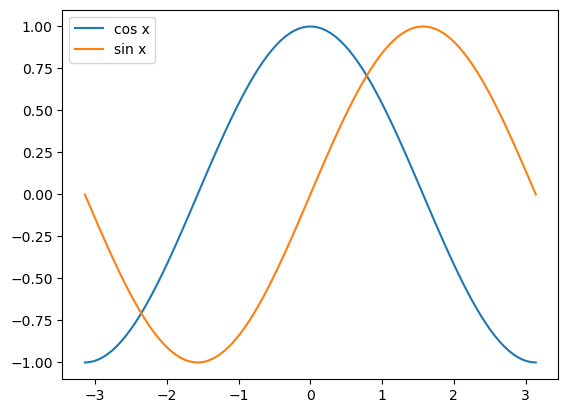

In [4]:
#standard pyplot interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()

### 1.3 Here comes the comparison

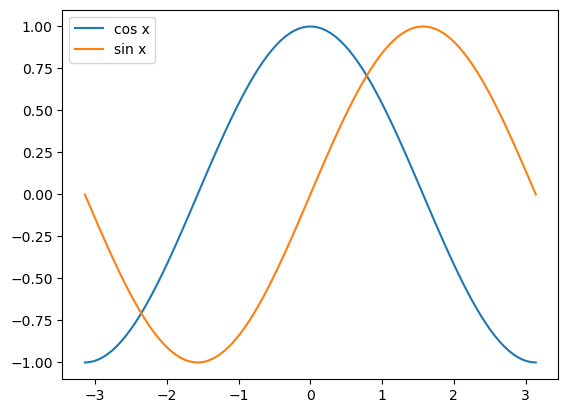

In [12]:
#Objected Oriented Interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

- in OO interface the user has to start by keying in subplots
- then they must key in the figure and axis which can be named wtv
---
- _above code for ref_
- fig, ax = plt.subplots(nrows=1, ncols=1)
- ax.plot(x, cos_x, label='cos x')
- ax.plot(x, sin_x, label='sin x')
- ax.legend()
- plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

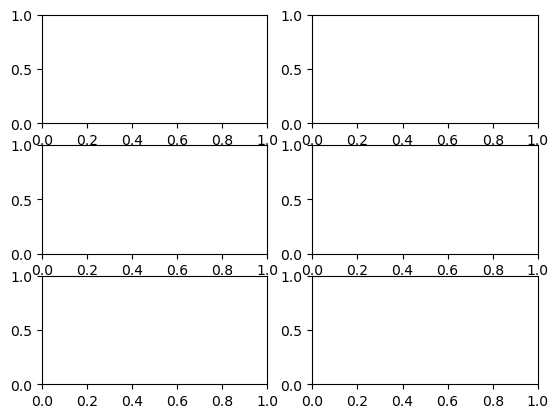

In [11]:
# Objected Oriented Interface
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=3, ncols=2)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

#wait theres an error but the graph is still showing

## 2 Using the OO Interface

### 2.1 Getting ax

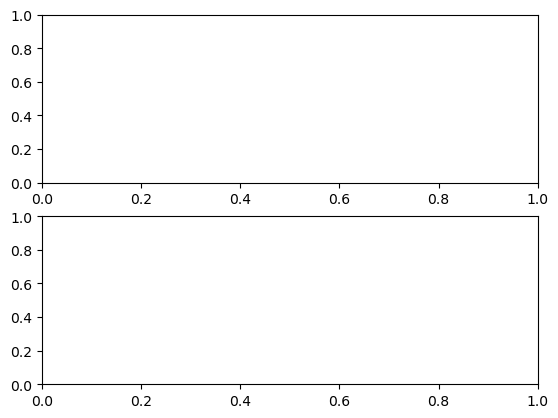

In [5]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=2)

### 2.2 What is ax

In [6]:
type(ax)

numpy.ndarray

In [7]:
import numpy as np
from matplotlib import pyplot as plt

ax.shape

(2,)

In [8]:
type(ax[0])

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

In [16]:
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

plt.show()
#wait actually do i need to pltshow
#is there anything to show

### 2.4 Legends

In [19]:
#supposedly the less efficient method
#lets see if varying upper left and right for the legend will change anything

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
ax[0].legend('upper right')
ax[1].legend('upper left')

#wait how come when i have plt.show() theres no output but when i dont put plt.show() they put some coordinate thing

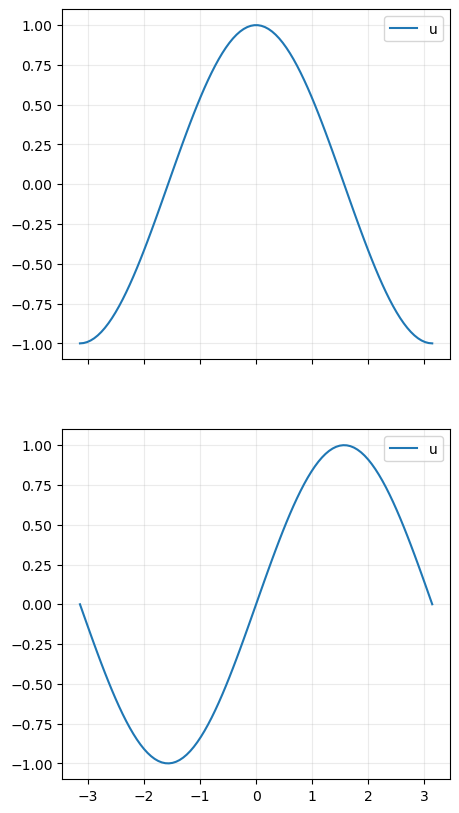

In [20]:
#more efficient method with "for"
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 10),   # 10 x 5 inches!
                       sharex=True)
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
for a in ax:
    a.legend('upper right')
    a.grid(alpha=.25)
    
#wait what how come this one has output 

### 2.5 Tweaks

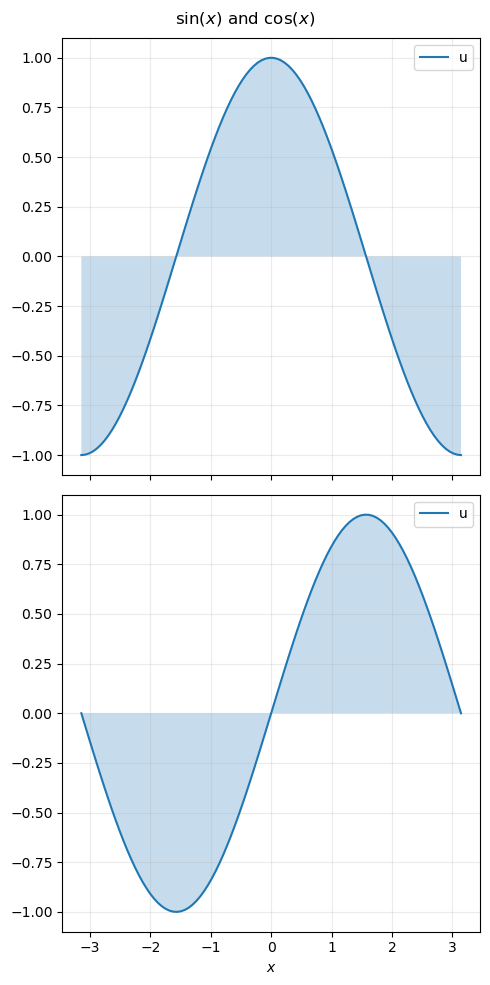

In [21]:
#finalised plot code after walkthrough

fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 10),   # 10 x 5 inches!
                       sharex=True)
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
for a in ax:
    a.legend('upper right')
    a.grid(alpha=.25)
ax[1].set_xlabel('$x$')
#have to specify set label under the OO interface

#now to fill the plot
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].fill_between(x, 0, sin_x, alpha=.25)
#adding a super title
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
#lets ask matplotlib to make some adjustments
fig.tight_layout()


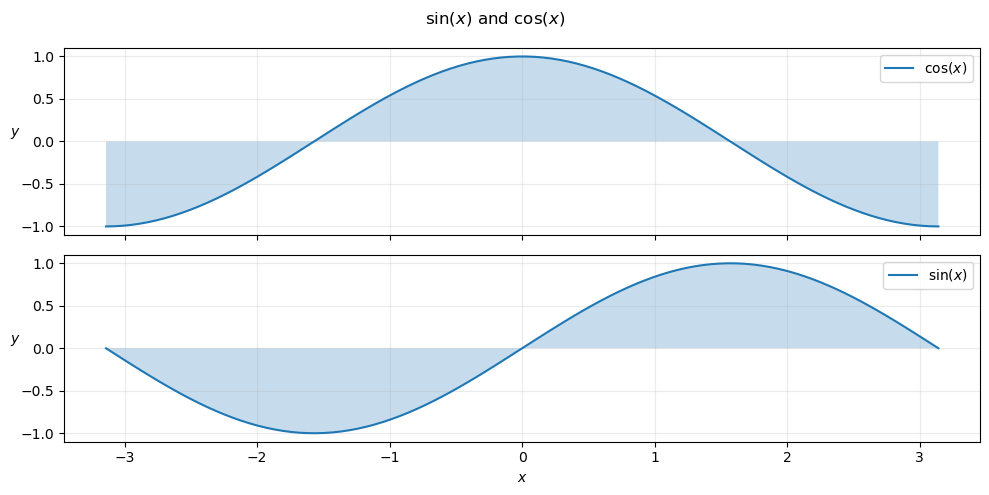

In [22]:
#code they provided 
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(10, 5),   # 10 x 5 inches!
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.show()

## 3 More rows and columns

### 3.1 Using ax

In [ ]:
#what is np.ones_like()
#where does it appear to generate an array of 1's

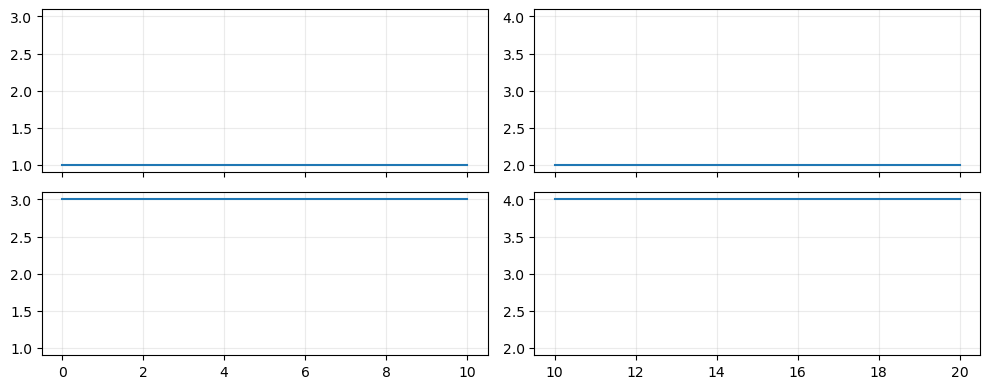

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

In [24]:
#accessing each axes
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))

In [25]:
#easier way to access axes 
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [26]:
#another way of accessing the axes
#flatten turns the 2D array into a 1D
top_left, top_right, bottom_left, bottom_right = ax.flatten()

### 3.2 Sharing axes

In [ ]:
#sharex() but never specify how to share

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4))

In [ ]:
#ways of sharing axes
#True: make all axes use the same range
#col: use same range for all columns
#row: use same range for all rows

In [ ]:
#given way of sharing axes
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex=True, sharey='row')

### 3.3 Accessing all axes

In [ ]:
#inefficient way of adjusting axes:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [27]:
#more efficient way of adjusting axes using "for"
for a in ax.flatten():
    a.grid(alpha=.25)

## 4 Other useful plots

### 4.1 Histograms

### 4.2 Scatter plots

In [ ]:

# Your code here


### 4.3 Bar charts

In [ ]:

# Your code here


### 4.4 Pie charts

In [ ]:

# Your code here


## Exercise 1 :  Plotting data from files

In [ ]:



# Your solution here


